# Introdução à Clusterização e Kmeans

O algoritmo KMeans agrupa os dados tentando separar amostras em n grupos de variância igual, minimizando um critério conhecido como inércia ou soma dos quadrados dentro do cluster. Ele se adapta bem a um grande número de amostras e tem sido usado em uma grande variedade de áreas de aplicação em muitos campos diferentes.


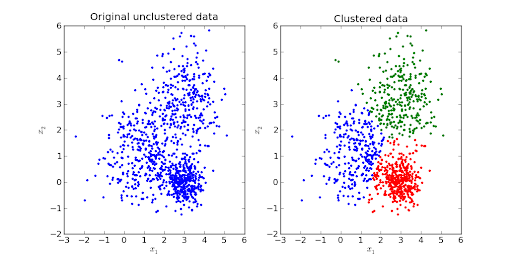

[Saiba Mais](https://scikit-learn.org/stable/modules/clustering.html#k-means)

[Guia de Uso](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

# Importações e configuração do Dataset

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/TailUFPB/fundos-imobiliarios/main/CSV_Antigos_PreProc/202010-ModeloML.csv")

In [ ]:
df.tail()

,Unnamed: 0,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
162,185,XPIN11,Outros,116.00,0.069530,0.037394,0.273196,0.364865,0.420635,0.381295,0.476923,0.641771,0.644020,0.559974,0.193157,0.031051,0.592920,0.094681,0.078125
163,186,XPLG11,Logística,135.00,0.227881,0.034982,0.221649,0.304054,0.365079,0.345324,0.408654,0.762062,0.760799,0.730977,0.605825,0.030666,0.752212,0.106383,0.203125
164,187,XPML11,Shoppings,114.12,0.253971,0.015682,0.123711,0.094595,0.142857,0.165468,0.139423,0.631196,0.627089,0.340043,0.540452,0.031215,0.566372,0.051064,0.203125
165,188,XPPR11,Outros,88.59,0.050991,0.044632,0.453608,0.547297,0.666667,0.000000,0.641346,0.398546,0.410028,0.390116,0.110397,0.027173,0.469027,0.170213,0.062500
166,189,XPSF11,Outros,96.49,0.161480,0.042220,0.376289,0.486486,0.595238,0.000000,0.575000,0.584270,0.591057,0.734741,0.088247,0.028170,0.513274,0.060638,0.000000


In [ ]:
df_k = df[df.columns[4:]]

display(df_k)

,Liquidez Diária,Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
0,0.009175,0.011460,0.123711,0.175676,0.166667,0.273381,0.196154,0.619960,0.616019,0.405007,0.276410,0.023711,0.477876,0.029787,0.015625
1,0.001736,0.052473,0.422680,0.000000,0.000000,0.000000,0.204808,0.651465,0.659865,0.810342,0.016039,0.028320,0.592920,0.060638,0.000000
2,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.669971,0.660082,0.203567,0.057181,0.572622,0.194690,0.757340,0.015625
3,0.064848,0.021713,0.139175,0.256757,0.349206,0.338129,0.413462,0.558934,0.556544,0.803469,0.120685,0.028645,0.787611,0.000000,0.109375
4,0.000735,0.031966,0.298969,0.445946,0.444444,0.000000,0.467308,1.000000,1.000000,0.534282,0.007631,0.025807,0.495575,0.060638,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.069530,0.037394,0.273196,0.364865,0.420635,0.381295,0.476923,0.641771,0.644020,0.559974,0.193157,0.031051,0.592920,0.094681,0.078125
163,0.227881,0.034982,0.221649,0.304054,0.365079,0.345324,0.408654,0.762062,0.760799,0.730977,0.605825,0.030666,0.752212,0.106383,0.203125
164,0.253971,0.015682,0.123711,0.094595,0.142857,0.165468,0.139423,0.631196,0.627089,0.340043,0.540452,0.031215,0.566372,0.051064,0.203125
165,0.050991,0.044632,0.453608,0.547297,0.666667,0.000000,0.641346,0.398546,0.410028,0.390116,0.110397,0.027173,0.469027,0.170213,0.062500


# Clusterização mais lógica?!

Bom, como estamos tentando descobrir quais fundos imobiliários são bons para investir, porque não tentar separlos em três grupos (bom investimentos, médio, mau investimento)?

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=500).fit(df_k)

In [ ]:
kmeans.labels_

array([2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1,
       2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1,
       1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1,
       2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0], dtype=int32)

In [ ]:
df["cluster"] = pd.DataFrame(kmeans.labels_)

for i in range(0, 3):
  x = df[df["cluster"] == i]
  x.to_csv(f"/content/drive/MyDrive/data/3Cluster{i}.csv")
  print(x['Códigodo fundo'])
  print("-------------------------------------------------------------------------------")

3      ALZR11
6      BARI11
7      BBPO11
8      BBRC11
9      BCFF11
        ...  
160    XPCI11
162    XPIN11
163    XPLG11
165    XPPR11
166    XPSF11
Name: Códigodo fundo, Length: 80, dtype: object
-------------------------------------------------------------------------------
1      AFCR11
4      ARRI11
5      ATSA11
12     BICR11
16     BPML11
17     BRCO11
21     BZLI11
25     CPFF11
35     EURO11
37     FATN11
43     FIVN11
45     FLRP11
48     GCFF11
64     HLOG11
65     HMOC11
66     HPDP11
69     HUSC11
72     JPPA11
79     LASC11
80     LGCP11
81     LUGG11
87     MFAI11
90     MGHT11
91     MORE11
92     NCHB11
93     NEWL11
96     ONEF11
102    PATL11
103    PLCR11
106    PQAG11
109    PVBI11
110    QAGR11
111    QMFF11
112    RBBV11
117    RBIV11
119    RBRL11
125    RDPD11
128    RFOF11
131    RVBI11
133    SARE11
136    SHPH11
138    TEPP11
141    TORD11
144    URPR11
145    VCJR11
148    VIFI11
157    VVPR11
Name: Códigodo fundo, dtype: object
------------------------

In [ ]:
for i in range(len(kmeans.labels_)):
  if kmeans.labels_[i] ==0:
    print(df['Códigodo fundo'].iloc[i])
print("----------------")

for i in range(len(kmeans.labels_)):
  if kmeans.labels_[i] ==1:
    print(df['Códigodo fundo'].iloc[i])
print("----------------")

for i in range(len(kmeans.labels_)):
  if kmeans.labels_[i] ==2:
    print(df['Códigodo fundo'].iloc[i])

ALZR11
BARI11
BBPO11
BBRC11
BCFF11
BCRI11
BMLC11B
BNFS11
BPFF11
BRCR11
BTLG11
CBOP11
CEOC11
CPTS11
CTXT11
CVBI11
EDFO11B
FAED11
FCFL11
FEXC11
FIIB11
FIIP11B
FPAB11
GGRC11
GRLV11
GTWR11
HABT11
HBRH11
HBTT11
HCRI11
HFOF11
HGCR11
HGFF11
HGLG11
HGPO11
HGRU11
IRDM11
JSRE11
KFOF11
KNHY11
KNIP11
KNRI11
LVBI11
MAXR11
MBRF11
MCCI11
MFII11
MGFF11
NSLU11
OUCY11
OUFF11
OUJP11
OULG11
PORD11
PRSV11
RBED11
RBFF11
RBRF11
RBRP11
RBRR11
RBRY11
RECR11
RECT11
SDIL11
SPTW11
TGAR11
THRA11
TRXF11
VGIP11
VGIR11
VILG11
VINO11
VLOL11
VRTA11
VTLT11
XPCI11
XPIN11
XPLG11
XPPR11
XPSF11
----------------
AFCR11
ARRI11
ATSA11
BICR11
BPML11
BRCO11
BZLI11
CPFF11
EURO11
FATN11
FIVN11
FLRP11
GCFF11
HLOG11
HMOC11
HPDP11
HUSC11
JPPA11
LASC11
LGCP11
LUGG11
MFAI11
MGHT11
MORE11
NCHB11
NEWL11
ONEF11
PATL11
PLCR11
PQAG11
PVBI11
QAGR11
QMFF11
RBBV11
RBIV11
RBRL11
RDPD11
RFOF11
RVBI11
SARE11
SHPH11
TEPP11
TORD11
URPR11
VCJR11
VIFI11
VVPR11
----------------
ABCP11
ALMI11
BCIA11
BTCR11
CNES11
CRFF11
CXTL11
DMAC11
DOMC11
EDGA11
FIGS

# Descobrindo o melhor "K"

Existe uma técnica bastante usada para clusterização que é a "Soma do erro Quadrático". Ela nos ajuda a ver quando o erro começa a ter menor variação e nos ajuda a descobrir os melhores "K" para nosso modelo.

In [ ]:
sse =[]
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(df_k[:-20])
  sse.append(kmeans.inertia_)

print(sse)

[55.55014756723493, 42.12783415800189, 37.419025372351186, 33.75055199610435, 30.48196171328263, 27.432421694933147, 24.928471425128798, 23.416089693338357, 21.85938104481307, 20.94892013013018, 19.798919587591577, 18.776996855056485, 17.800198273100218, 17.02169118879802, 16.07756180673856, 15.448006063076079, 14.828604662112852, 14.09678067447033, 13.637974955391341]


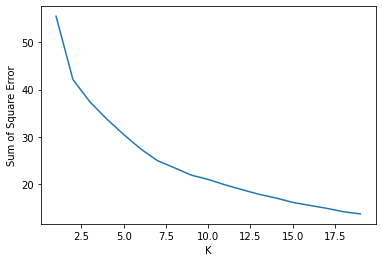

In [ ]:
plt.xlabel("K")
plt.ylabel("Sum of Square Error")
plt.plot(range(1,20), sse)

Podemos perceber que a descida é menos ingrime a cada iteração a partir do numero de clusters igual a 10, tanto no gráfico quanto na lista de soma de erro quadrático. Então vamos adotar 10 como o numéro de núcleos.

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_k)
print(kmeans.labels_)

[8 2 0 3 1 2 5 5 5 9 7 5 2 3 5 7 2 6 9 7 3 2 7 7 8 1 5 7 7 5 8 7 2 3 8 3 7
 2 3 3 8 3 5 0 8 2 7 8 2 3 3 3 5 1 4 5 9 9 3 3 9 3 9 3 6 2 2 9 0 6 1 5 2 8
 9 3 3 9 9 2 1 1 3 8 4 4 3 6 5 7 1 6 2 1 8 5 3 7 7 3 7 8 2 1 7 5 2 4 3 2 1
 2 2 7 3 7 8 1 7 6 3 3 3 7 7 3 5 5 2 8 7 1 8 2 8 3 2 5 1 5 3 6 8 1 2 1 6 7
 6 3 1 9 3 7 7 8 3 1 8 8 1 0 3 9 9 1 1]


In [ ]:
df["cluster"] = pd.DataFrame(kmeans.labels_)
display(df)

,Unnamed: 0,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos,cluster
0,0,ABCP11,Shoppings,78.45,0.009175,0.011460,0.123711,0.175676,0.166667,0.273381,0.196154,0.619960,0.616019,0.405007,0.276410,0.023711,0.477876,0.029787,0.015625,8
1,1,AFCR11,Híbrido,106.80,0.001736,0.052473,0.422680,0.000000,0.000000,0.000000,0.204808,0.651465,0.659865,0.810342,0.016039,0.028320,0.592920,0.060638,0.000000,2
2,2,ALMI11,Lajes Corporativas,1204.69,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.669971,0.660082,0.203567,0.057181,0.572622,0.194690,0.757340,0.015625,0
3,3,ALZR11,Logística,129.90,0.064848,0.021713,0.139175,0.256757,0.349206,0.338129,0.413462,0.558934,0.556544,0.803469,0.120685,0.028645,0.787611,0.000000,0.109375,3
4,5,ARRI11,Títulos e Val. Mob.,86.73,0.000735,0.031966,0.298969,0.445946,0.444444,0.000000,0.467308,1.000000,1.000000,0.534282,0.007631,0.025807,0.495575,0.060638,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,185,XPIN11,Outros,116.00,0.069530,0.037394,0.273196,0.364865,0.420635,0.381295,0.476923,0.641771,0.644020,0.559974,0.193157,0.031051,0.592920,0.094681,0.078125,3
163,186,XPLG11,Logística,135.00,0.227881,0.034982,0.221649,0.304054,0.365079,0.345324,0.408654,0.762062,0.760799,0.730977,0.605825,0.030666,0.752212,0.106383,0.203125,9
164,187,XPML11,Shoppings,114.12,0.253971,0.015682,0.123711,0.094595,0.142857,0.165468,0.139423,0.631196,0.627089,0.340043,0.540452,0.031215,0.566372,0.051064,0.203125,9
165,188,XPPR11,Outros,88.59,0.050991,0.044632,0.453608,0.547297,0.666667,0.000000,0.641346,0.398546,0.410028,0.390116,0.110397,0.027173,0.469027,0.170213,0.062500,1


# Separando os dataframes por clusters

In [ ]:
for i in range(0, 10):
  x = df[df["cluster"] == i]
  x.to_csv(f"/content/drive/MyDrive/data/Cluster {i}.csv")
  print(x['Códigodo fundo'])
  print("-------------------------------------------------------------------------------")

2      ALMI11
43     FIVN11
68     HTMX11
161    XPHT11
Name: Códigodo fundo, dtype: object
-------------------------------------------------------------------------------
4      ARRI11
25     CPFF11
53     HBRH11
70     IBFF11
80     LGCP11
81     LUGG11
90     MGHT11
93     NEWL11
103    PLCR11
110    QAGR11
117    RBIV11
131    RVBI11
138    TEPP11
143    TRXF11
145    VCJR11
150    VINO11
157    VVPR11
160    XPCI11
165    XPPR11
166    XPSF11
Name: Códigodo fundo, dtype: object
-------------------------------------------------------------------------------
1      AFCR11
5      ATSA11
12     BICR11
16     BPML11
21     BZLI11
32     DOMC11
37     FATN11
45     FLRP11
48     GCFF11
65     HMOC11
66     HPDP11
72     JPPA11
79     LASC11
92     NCHB11
102    PATL11
106    PQAG11
109    PVBI11
111    QMFF11
112    RBBV11
128    RFOF11
133    SARE11
136    SHPH11
144    URPR11
Name: Códigodo fundo, dtype: object
--------------------------------------------------------------------------